In [1]:
import tensorflow_datasets as tfds

In [2]:
td, info= tfds.load('mnist', split=['train[:5]', 'train[50%:]'], with_info=True)

In [23]:
info

tfds.core.DatasetInfo(
    name='mnist',
    version=3.0.0,
    description='The MNIST database of handwritten digits.',
    homepage='http://yann.lecun.com/exdb/mnist/',
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
    }),
    total_num_examples=70000,
    splits={
        'test': 10000,
        'train': 60000,
    },
    supervised_keys=('image', 'label'),
    citation="""@article{lecun2010mnist,
      title={MNIST handwritten digit database},
      author={LeCun, Yann and Cortes, Corinna and Burges, CJ},
      journal={ATT Labs [Online]. Available: http://yann. lecun. com/exdb/mnist},
      volume={2},
      year={2010}
    }""",
    redistribution_info=,
)

In [24]:
trf_record = lambda e: (e["image"], e["label"])
td[0].map(trf_record).batch(2).take(1)

<DatasetV1Adapter shapes: ((None, 28, 28, 1), (None,)), types: (tf.uint8, tf.int64)>

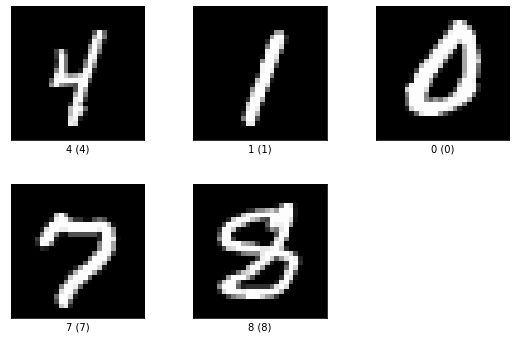

In [25]:
fig = tfds.show_examples(info, td[0])

In [12]:
import tensorflow_federated as tff
# Load simulation data.
source, _ = tff.simulation.datasets.emnist.load_data()


def client_data(n):
    trf_record = lambda e: (tf.expand_dims(e["pixels"], -1), e["label"])
    return (
        source.create_tf_dataset_for_client(source.client_ids[n])
        .map(trf_record)
        .repeat(5)
        .batch(50)
    )


tff_data = client_data(0)

In [14]:
tff_data.take(1)

<TakeDataset shapes: ((None, 28, 28, 1), (None,)), types: (tf.float32, tf.int32)>

In [33]:
td, info= tfds.load('mnist', split=['train', 'test'], with_info=True)

In [34]:
train, test = td

In [38]:
train_0 = train.filter(lambda x: x['label'] >= 5)

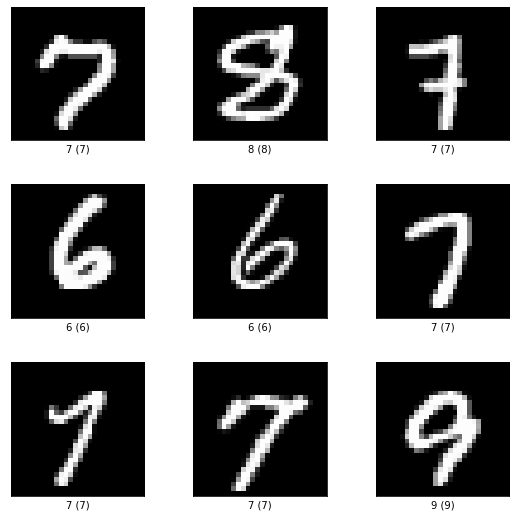

In [44]:
fig = tfds.show_examples(info, train_0)

In [15]:
train, info= tfds.load('mnist', split='train', with_info=True, as_supervised=True)

In [6]:
[len(list(train[0].filter(lambda x: x['label'] == i))) for i in range(10)]

[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]

In [21]:
tfds.load('mnist', split='train[:3]', as_supervised=True)

<DatasetV1Adapter shapes: ((28, 28, 1), ()), types: (tf.uint8, tf.int64)>

In [ ]:
[l for _, l in train.as_numpy_iterator()]

In [23]:
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [59]:
t = lambda x, y: (tf.cast(tf.expand_dims(x, -1), tf.float32) / 255, y)
tf.data.Dataset.from_tensor_slices((x_test, y_test)).map(t)

<MapDataset shapes: ((28, 28, 1), ()), types: (tf.float32, tf.uint8)>

In [33]:
from tensorflow.keras.layers import InputLayer, Conv2D, Flatten, Dense, ReLU
model = tf.keras.Sequential([InputLayer((28, 28, 3)),
                        Conv2D(32, 5, activation='relu'),
                        Conv2D(64, 5, activation='relu'),
                        Flatten(),
                        Dense(512, activation='relu'),
                        Dense(10)])
model2 = tf.keras.models.clone_model(model)

In [42]:
import numpy as np
np.mean((model.get_weights()[0], model2.get_weights()[0]))

0.00037321908

In [50]:
np.mean((model.get_weights(), model2.get_weights()),axis=0)[1].shape

(32,)

In [51]:
zip(model.get_weights(), model2.get_weights())[1][0].shape

TypeError: 'zip' object is not subscriptable